<a href="https://colab.research.google.com/github/Adrok24/classification-of-plant-diseases/blob/main/plants_disease_RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from zipfile import ZipFile 
import os
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')

Mounted at /content/drive


In [3]:
import zipfile
folder = 'drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'
plants_files_folder = "Plant_leave_diseases_dataset_without_augmentation"
with zipfile.ZipFile(folder,"r") as zip_ref:
    zip_ref.extractall("Plants")

In [4]:
base_dir = './Plants'
os.makedirs(base_dir, exist_ok=True)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [6]:
plants_categories = os.listdir('/'.join((base_dir,plants_files_folder)))

# Creamos los directorios para las 39 clases presentes en el dataset
for directory in (train_dir, validation_dir, test_dir):
    for folder_name in plants_categories:
        class_directory = os.path.join(directory, folder_name)
        os.makedirs(class_directory, exist_ok=True)
        

[1591, 1076, 5090, 985, 275, 621, 952, 630, 1909, 1192, 456, 1383, 423, 1162, 2297, 1502, 1052, 1478, 1676, 373, 371, 1771, 5357, 5507, 513, 1109, 2127, 1000, 1835, 1180, 1645, 997, 1000, 854, 360, 1404, 152, 1143, 1000]


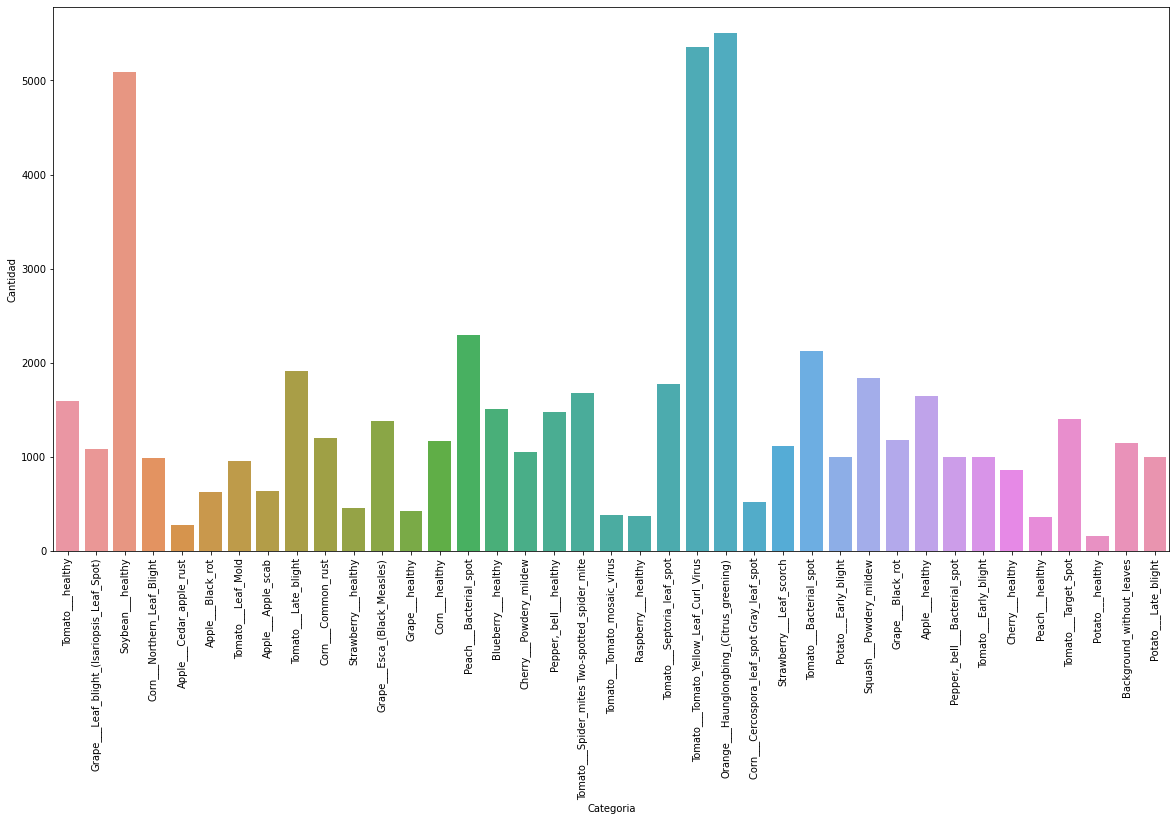

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

number_of_pics_per_class = [len(os.listdir('/'.join((base_dir,plants_files_folder,plant_category)))) for plant_category in plants_categories]
statistics = list(zip(plants_categories, number_of_pics_per_class))

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
df = pd.DataFrame(statistics, columns=['Categoria', 'Cantidad'])

sns.barplot(data=df, x=df.Categoria, y=df.Cantidad)
ax.set_xticklabels(labels=df.Categoria, rotation=90)

print(number_of_pics_per_class)

In [32]:
import shutil
from os import path

for plant_category in plants_categories:
    plants_pictures = os.listdir('/'.join((base_dir,plants_files_folder, plant_category)))

    #Dividimos train 80%, validation 10% y test 10%. 
    train_ds = plants_pictures[:int(len(plants_pictures)*0.8)]
#     validation_ds = plants_pictures[int(len(plants_pictures)*0.8): int(len(plants_pictures)*0.9)]
#     test_ds = plants_pictures[int(len(plants_pictures)*0.8): int(len(plants_pictures)*0.9)]


    #Copio los porcentajes de cada clase en su correspondiente carpeta
    fnames = ['image ({}).JPG'.format(i) for i in range(1,len(train_ds))]
    for fname in fnames:
        src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
        dst = os.path.join(base_dir,'train',plant_category, fname)
        if path.isfile(src):
          shutil.copyfile(src, dst)
    fnames_min = ['image ({}).jpg'.format(i) for i in range(1,len(train_ds))]
    for fname in fnames_min:
        src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
        dst = os.path.join(base_dir,'train',plant_category, fname)
        if path.isfile(src):
          shutil.copyfile(src, dst)


    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.8), int(len(plants_pictures)*0.9))]
    for fname in fnames:
      src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
      dst = os.path.join(base_dir,'validation',plant_category, fname)
      if path.isfile(src):
        shutil.copyfile(src, dst)  

    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.9), len(plants_pictures))]
    for fname in fnames:
      src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
      dst = os.path.join(base_dir,'test',plant_category, fname)
      if path.isfile(src):
        shutil.copyfile(src, dst)                
        

In [12]:
print([plant for plant in plants_categories])

['Tomato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Corn___Northern_Leaf_Blight', 'Apple___Cedar_apple_rust', 'Apple___Black_rot', 'Tomato___Leaf_Mold', 'Apple___Apple_scab', 'Tomato___Late_blight', 'Corn___Common_rust', 'Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Corn___healthy', 'Peach___Bacterial_spot', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Pepper,_bell___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_mosaic_virus', 'Raspberry___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Potato___Early_blight', 'Squash___Powdery_mildew', 'Grape___Black_rot', 'Apple___healthy', 'Pepper,_bell___Bacterial_spot', 'Tomato___Early_blight', 'Cherry___healthy', 'Peach___healthy', 'Tomato___Target_Spot', 'Potato___he

In [35]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255)

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=8, min_delta=0.01 ,restore_best_weights=True)
checkpoint_callback = ModelCheckpoint('drive/My Drive/model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [36]:

# Reescalamos todas las imágenes en un factor de 1./255
test_datagen = ImageDataGenerator(rescale=1./255)

# La función flow_from_directory() toma el path a un directorio
# y genera batches de data a la que aplica las transformaciones definidas
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

Found 44304 images belonging to 39 classes.
Found 5272 images belonging to 39 classes.


In [37]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(39, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [39]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [42]:
from sklearn.utils import class_weight
import numpy as np

print((np.unique(train_generator.classes)))
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator.classes), 
            train_generator.classes)

class_weights = {i : class_weights[i] for i in range(39)}
#README este metodo compute_class_weight me devuelve una clase menosc
print(class_weights)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
{0: 2.2584493041749503, 1: 2.294949494949495, 2: 5.187214611872146, 3: 0.8638783269961977, 4: 1.244249726177437, 5: 0.9466666666666667, 6: 1.3523809523809525, 7: 1.6656891495601174, 8: 2.7775061124694376, 9: 1.1932773109243697, 10: 1.4434561626429478, 11: 1.2241379310344827, 12: 1.2046659597030753, 13: 1.0280542986425338, 14: 1.3224679860302677, 15: 3.370919881305638, 16: 0.2579473206176203, 17: 0.6187363834422658, 18: 3.9581881533101044, 19: 1.4271356783919598, 20: 0.9618966977138018, 21: 1.4217772215269087, 22: 1.4217772215269087, 23: 9.466666666666667, 24: 3.8508474576271188, 25: 0.2790469172193564, 26: 0.7743694614860259, 27: 1.2821670428893905, 28: 3.1294765840220387, 29: 0.668235294117647, 30: 1.4217772215269087, 31: 0.744429882044561, 32: 1.4947368421052631, 33: 0.8028268551236749, 34: 0.8483943241224795, 35: 1.0124777183600713, 36: 0.26517273576097106, 37: 3.8

In [43]:
spe = 42000 / 20

history = model.fit_generator(train_generator,
                              steps_per_epoch=spe,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=100,
                              class_weight=class_weights,
                              callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 3.2242 - accuracy: 0.1300
Epoch 00001: val_loss improved from inf to 3.70374, saving model to drive/My Drive/model.h5
100/100 [==============================] - 105s 1s/step - loss: 3.2242 - accuracy: 0.1300 - val_loss: 3.7037 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 3.1055 - accuracy: 0.1356
Epoch 00002: val_loss did not improve from 3.70374
100/100 [==============================] - 103s 1s/step - loss: 3.1055 - accuracy: 0.1356 - val_loss: 3.7305 - val_accuracy: 0.0700
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 3.5155 - accuracy: 0.1310
Epoch 00003: val_loss improved from 3.70374 to 3.64654, saving model to drive/My Drive/model.h5
100/100 [==============================] - 103s 1s/step - loss: 3.5155 - accuracy: 0.1310 - val_loss: 3.6465 - val_accuracy: 0.0340
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss:

KeyboardInterrupt: ignored

In [130]:
model.save('drive/My Drive/primera_prueba.h5')

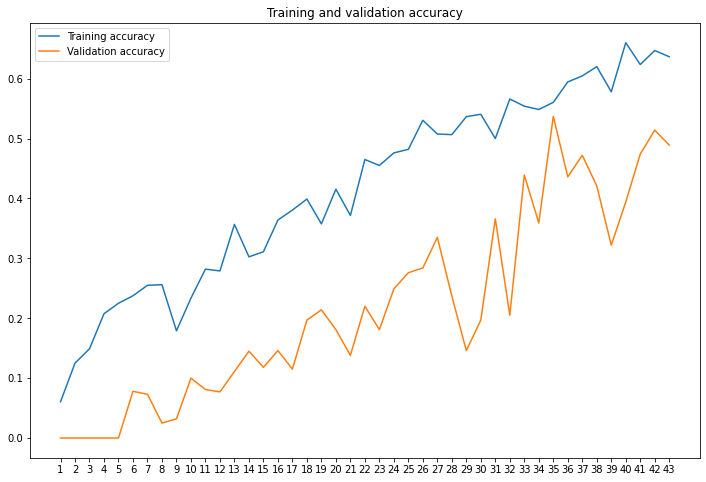

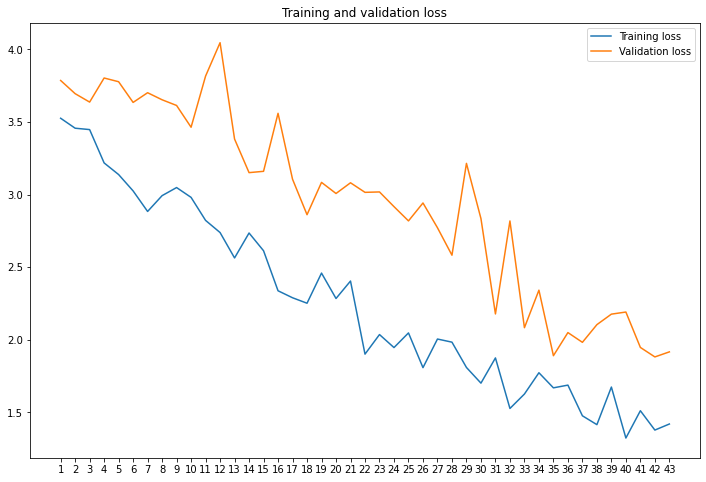

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [131]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt

Found 5288 images belonging to 39 classes.
39
Accuracy en test: 0.51
Confusion Matrix
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mit

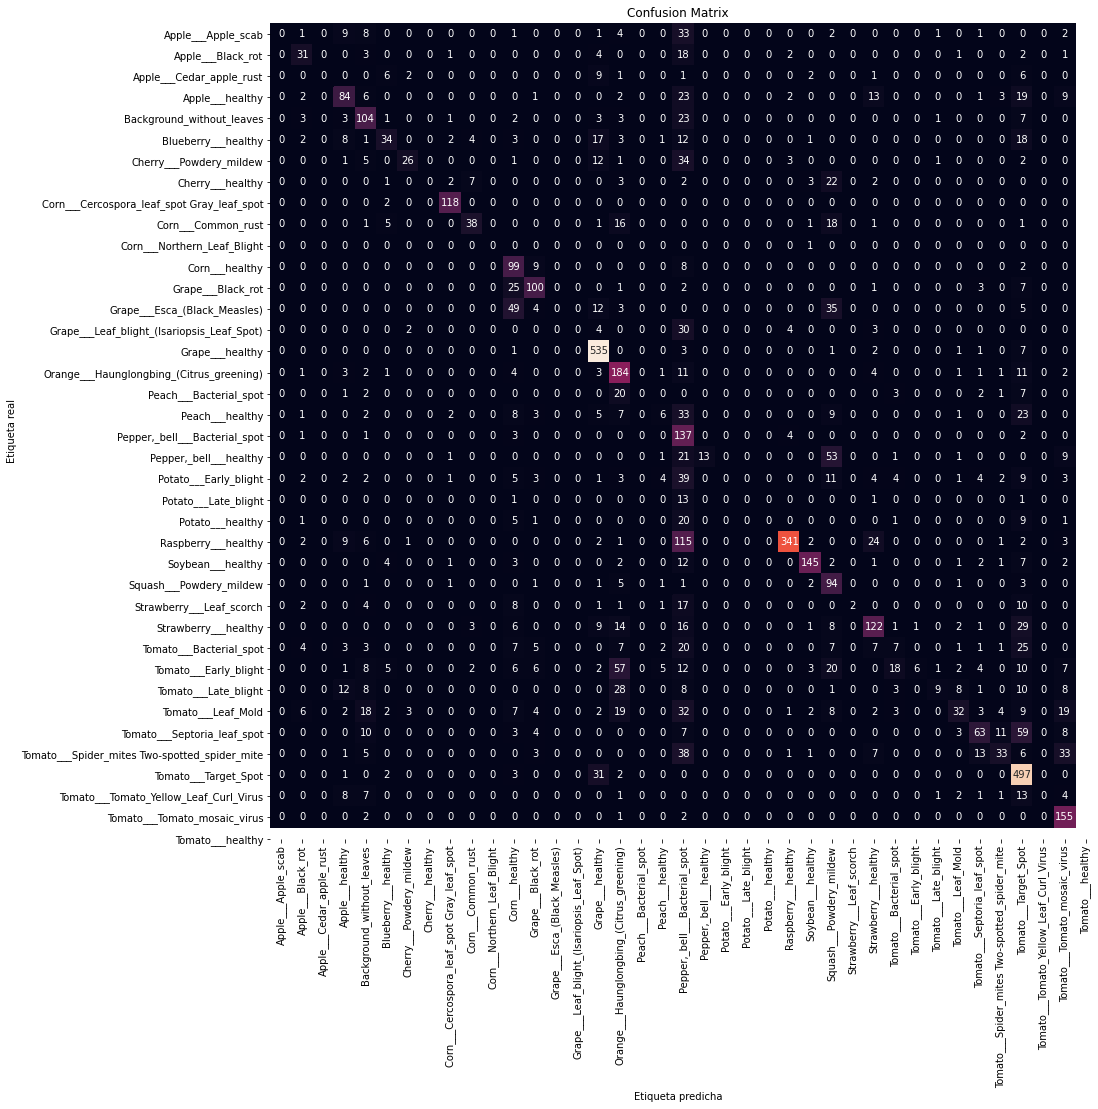

In [132]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)


labels = validation_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
tick_labels = list(labels.values())
print(len(tick_labels))
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Accuracy en test:', np.round(test_acc, 2))

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

print(tick_labels)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels, yticklabels=tick_labels,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()




In [133]:
# # Classification report
len(tick_labels)
print('\nClassification Report:\n')
print(classification_report(test_generator.classes, y_pred, target_names=tick_labels, digits = 6, labels=range(len(tick_labels))))


Classification Report:

                                               precision    recall  f1-score   support

                           Apple___Apple_scab   0.000000  0.000000  0.000000        63
                            Apple___Black_rot   0.525424  0.492063  0.508197        63
                     Apple___Cedar_apple_rust   0.000000  0.000000  0.000000        28
                              Apple___healthy   0.567568  0.509091  0.536741       165
                    Background_without_leaves   0.000000  0.000000  0.000000         0
                          Blueberry___healthy   0.497608  0.688742  0.577778       151
                      Cherry___Powdery_mildew   0.539683  0.320755  0.402367       106
                             Cherry___healthy   0.764706  0.302326  0.433333        86
   Corn___Cercospora_leaf_spot Gray_leaf_spot   0.000000  0.000000  0.000000        42
                           Corn___Common_rust   0.907692  0.983333  0.944000       120
                 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
%load_ext tensorboard
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Add, Dense
from tensorflow.keras.initializers import he_normal
import datetime


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [66]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [67]:
x_input = Input((150, 150, 3))

resnet50_pretrained = ResNet50(
    include_top=False,
    pooling='avg',
    input_shape=((150, 150, 3)),
)

resnet50_pretrained.trainable = False



In [68]:
x = resnet50_pretrained(x_input)

In [69]:
#x = Dense(512, activation='relu', name='layer1_512')(x)
#x = Dense(256, activation='relu', name='layer1_256')(x)
x = Dense(39, activation='softmax', name='layer3_39')(x)

resnet50_pretrained = Model(inputs=x_input, outputs=x, name='ResNet50')

resnet50_pretrained.summary()

Model: "ResNet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
layer3_39 (Dense)            (None, 39)                79911     
Total params: 23,667,623
Trainable params: 79,911
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet50_pretrained.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = resnet50_pretrained.fit(train_generator,
                       steps_per_epoch=train_generator.n//train_generator.batch_size,
                       epochs=20,
                       validation_data=validation_generator,
                       validation_steps=validation_generator.n//validation_generator.batch_size,
                       class_weight=class_weights,
                       callbacks=[early_stopping_callback, checkpoint_callback])



Epoch 1/20
   1/2215 [..............................] - ETA: 0s - loss: 1.0865 - accuracy: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2215/2215 [==============================] - ETA: 0s - loss: 4.0134 - accuracy: 0.0781

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)


labels = validation_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
tick_labels = list(labels.values())
print(len(tick_labels))
test_loss, test_acc = resnet50_pretrained.evaluate_generator(test_generator, steps=50)
print('Accuracy en test:', np.round(test_acc, 2))

Y_pred = resnet50_pretrained.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

print(tick_labels)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels, yticklabels=tick_labels,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
%tensorboard --logdir logs